1.no feature selction done 
2.no outlier  treatment


In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (10,5)


In [2]:
df=pd.read_clipboard()

E:\programs\lib\site-packages\IPython\core\interactiveshell.py:3254: DtypeWarning: Columns (2,19,21,49,85,86,100) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [3]:
df.head()

,custid,region,townsize,gender,age,agecat,birthmonth,ed,edcat,jobcat,...,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,3964-QJWTRG-NPN,1.0,2.00,1.0,20.0,2.0,September,15.0,3.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0648-AIPJSP-UVM,5.0,5.00,0.0,22.0,2.0,May,17.0,4.0,2.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
2,5195-TLUDJE-HVO,3.0,4.00,1.0,67.0,6.0,June,14.0,2.0,2.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,4459-VLPQUH-3OL,4.0,3.00,0.0,23.0,2.0,May,16.0,3.0,2.0,...,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
4,8158-SMTQFB-CNO,2.0,2.00,0.0,26.0,3.0,July,16.0,3.0,2.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [4]:
imp=['ownfax', 'ownvcr', 'active', 'voice', 'internet', 'owntv', 'tollmon', 'equipten', 'card2spent', 'equip', 'tollfree', 'cardmon', 'wireten', 'ebill', 'cardtenurecat', 'equipmon', 'wireless', 'card2benefit', 'pager', 'response_03', 'response_01', 'card2tenurecat', 'ownpc', 'owngame', 'card2type', 'card2fee', 'wiremon', 'tollten', 'cardspent', 'owncd', 'churn', 'callcard', 'multline', 'forward', 'owndvd', 'response_02', 'tenure', 'cardten', 'ownpda', 'ownipod', 'card2', 'news']

In [5]:
ndf=df.loc[:,imp]

In [6]:
a=['address', 'age', 'bfast', 'birthmonth', 'callid', 'callwait', 'card2tenure', 'cardtenure', 'cartype', 'commutebike', 'commutebus', 'commutecar', 'commutecarpool', 'commutecat', 'commutemotorcycle', 'commutenonmotor', 'commutepublic', 'commuterail', 'commutetime', 'commutewalk', 'confer','custid', 'ed', 'employ', 'hourstv', 'lncardmon', 'lncardten', 'lncreddebt', 'lnequipmon', 'lnequipten', 'lninc', 'lnlongmon', 'lnlongten', 'lnothdebt', 'lntollmon', 'lntollten', 'lnwiremon', 'lnwireten', 'longmon', 'longten', 'pets_birds', 'pets_cats', 'pets_dogs', 'pets_freshfish', 'pets_reptiles', 'pets_saltfish', 'pets_small', 'spoused']

In [7]:
a=set(a)

In [8]:
b=set(df.columns)

In [9]:
ndf=df.loc[:,b-a]

In [10]:
ndf['total_spend']=ndf['cardspent']+ndf['card2spent']

In [11]:
del ndf['card2spent']

In [12]:
del ndf['cardspent']

In [13]:
import seaborn as sns
import  matplotlib

In [14]:
ndf.describe()

,wiremon,churn,owngame,owntv,polview,carvalue,income,multline,commute,gender,...,jobsat,pager,pets,cardfee,equipmon,creddebt,voice,edcat,ebill,total_spend
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,10.701190,0.253200,0.474800,0.983000,4.08860,23.232580,54.759600,0.488400,2.996200,0.503600,...,2.964200,0.243600,3.067400,0.189800,12.991310,1.857364,0.303000,2.672000,0.348600,498.07863
std,19.799837,0.434888,0.499415,0.129284,1.38706,21.231637,55.377511,0.499915,2.743518,0.500037,...,1.379456,0.429297,3.414497,0.392182,19.212943,3.415789,0.459601,1.211738,0.476575,351.52927
min,0.000000,0.000000,0.000000,0.000000,1.00000,-1.000000,9.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,8.11000
25%,0.000000,0.000000,0.000000,1.000000,3.00000,9.200000,24.000000,0.000000,1.000000,0.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,0.390000,0.000000,2.000000,0.000000,276.28250
50%,0.000000,0.000000,0.000000,1.000000,4.00000,17.000000,38.000000,0.000000,1.000000,1.000000,...,3.000000,0.000000,2.000000,0.000000,0.000000,0.930000,0.000000,2.000000,0.000000,414.25000
75%,20.962500,1.000000,1.000000,1.000000,5.00000,31.100000,67.000000,1.000000,4.000000,1.000000,...,4.000000,0.000000,5.000000,0.000000,30.800000,2.060000,1.000000,4.000000,1.000000,615.56250
max,186.250000,1.000000,1.000000,1.000000,7.00000,99.600000,1073.000000,1.000000,10.000000,1.000000,...,5.000000,1.000000,21.000000,1.000000,106.300000,109.070000,1.000000,5.000000,1.000000,4881.05000


In [15]:
ndf=ndf.replace('#NULL!',np.NaN)

In [16]:
ndf.townsize=ndf.townsize.astype('float')

In [17]:
ndf.dtypes.value_counts()

float64    80
object      1
dtype: int64

In [18]:
ndf.townsize.dtype

dtype('float64')

In [19]:
 del ndf['cardten']

In [20]:
ndf.card2fee.nunique(dropna=True)

2

In [21]:
df['pager']

0       1.0
1       1.0
2       0.0
3       0.0
4       0.0
       ... 
4995    0.0
4996    0.0
4997    0.0
4998    0.0
4999    0.0
Name: pager, Length: 5000, dtype: float64

In [22]:
c=list(ndf.columns)

In [23]:
a=[]
b=[]
for e in c:
    if ndf[e].nunique(dropna=True)>5:
        a.append(e)
    else:
        b.append(e)
        

In [24]:
df_dis=ndf.loc[:,a]

In [25]:
df_con=ndf.loc[:,b]

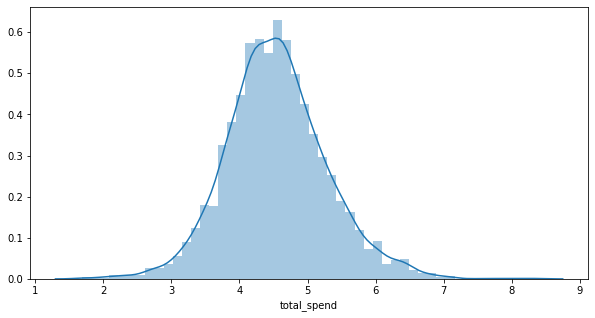

In [26]:
sns.distplot(np.sqrt(np.sqrt(df_dis.total_spend)))

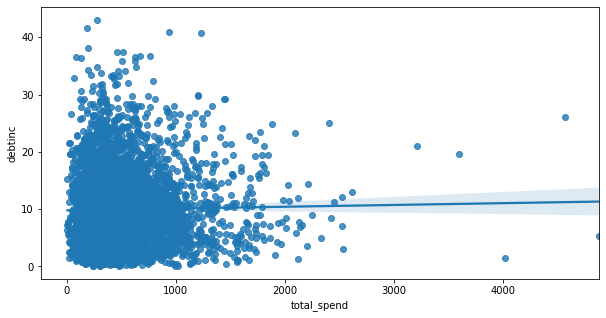

In [27]:
sns.regplot(x='total_spend',y='debtinc',data=df_dis)

In [28]:
df_con

,churn,owngame,owntv,multline,gender,addresscat,homeown,tollfree,card2tenurecat,agecat,...,polcontrib,wireless,ownpc,ownpda,jobsat,pager,cardfee,voice,edcat,ebill
0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,2.0,2.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,3.0,0.0
1,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,2.0,2.0,...,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,4.0,1.0
2,0.0,0.0,1.0,1.0,1.0,5.0,1.0,0.0,5.0,6.0,...,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,2.0,0.0
3,0.0,1.0,1.0,1.0,0.0,2.0,1.0,0.0,2.0,2.0,...,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,3.0,1.0
4,0.0,1.0,1.0,0.0,0.0,2.0,0.0,1.0,3.0,3.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.0,0.0,1.0,0.0,0.0,4.0,1.0,0.0,5.0,6.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4996,0.0,0.0,1.0,0.0,0.0,3.0,1.0,1.0,4.0,5.0,...,0.0,1.0,0.0,0.0,5.0,0.0,0.0,0.0,2.0,0.0
4997,0.0,0.0,1.0,1.0,0.0,5.0,1.0,1.0,5.0,6.0,...,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,4.0,0.0
4998,0.0,1.0,1.0,1.0,0.0,4.0,1.0,0.0,4.0,4.0,...,1.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,4.0,1.0


In [29]:
ndf.equipten.value_counts()[0]/ndf.shape[0]*100
    

65.92

In [30]:
ndf.tollten.value_counts()[0]/ndf.shape[0]*100

52.44

In [31]:
#more than 70 % values in wireten are null so it is wise to drop columns
ndf=ndf.drop(['equipten','tollten'],axis='columns')

In [32]:
df_dis=df_dis.drop(['wireten','equipten','tollten'],axis='columns')

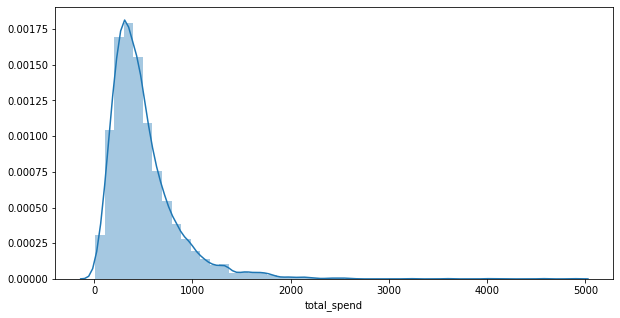

In [33]:
sns.distplot(df_dis.total_spend)

In [34]:
df_dis.total_spend.describe()

count    5000.00000
mean      498.07863
std       351.52927
min         8.11000
25%       276.28250
50%       414.25000
75%       615.56250
max      4881.05000
Name: total_spend, dtype: float64

In [35]:
ndf['trans_spend']=np.sqrt(np.sqrt(ndf.total_spend))

In [36]:
del ndf['total_spend']

In [37]:
equ='trans_spend~card2fee+card2benefit+internet+owndvd+wireless+tollfree+active+ownipod+pager+ownpda+tenure+churn+multline+voice+owngame+ownpc+wiremon+callcard+equipmon+equip+forward+card2+ownvcr+owncd+card2type+response_03+tollmon+ebill+news+response_02+ownfax+cardmon+cardtenurecat+owntv+response_01+card2tenurecat'

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
x,y=train_test_split(ndf,test_size=0.3,random_state=1234)

In [40]:
ndf=ndf.fillna(0)

In [41]:
x=ndf[ndf.columns.difference(['trans_spend'])]
y=ndf['trans_spend']

In [42]:
x_train,y_train,x_test,y_test=train_test_split(x,y,test_size=0.33, random_state=42)

## model with whole data set

In [43]:
import statsmodels.formula.api as smf
model = smf.ols(equ, data=ndf).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            trans_spend   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     8.421
Date:                Tue, 26 May 2020   Prob (F-statistic):           1.82e-42
Time:                        20:45:20   Log-Likelihood:                -5458.1
No. Observations:                5000   AIC:                         1.099e+04
Df Residuals:                    4963   BIC:                         1.123e+04
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.9879      0.100     39.

### feature engineeering

In [44]:
from sklearn.linear_model import Lasso


In [45]:
Lasso(alpha=0.1).fit(x,y).coef_

array([ 0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -8.70191723e-02,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -1.14308270e-03,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        4.16461989e-03,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  8.51412605e-04,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        3.44789392e-03,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -

In [46]:
ls=pd.DataFrame(data=Lasso(alpha=0.1).fit(x,y).coef_,index=x.columns,columns=['a'])

In [47]:
list(ls[ls['a']<0].index)

['card', 'cardmon', 'tenure']

In [48]:
list(ls[ls['a']>0].index)

['carvalue', 'equipmon', 'income', 'wireten']

In [49]:
lasso_imp=[list(ls[ls['a']>0].index),list(ls[ls['a']<0].index)]

In [50]:
lasso_imp

[['carvalue', 'equipmon', 'income', 'wireten'], ['card', 'cardmon', 'tenure']]

In [51]:
from sklearn.feature_selection import RFE

from sklearn.linear_model import LinearRegression

lm = LinearRegression()
rfe = RFE(lm, n_features_to_select=15).fit(x,y)
bool_RFE = rfe.get_support()


In [52]:
x.loc[:,bool_RFE]

,callcard,card,card2,card2fee,churn,gender,inccat,owncd,owndvd,owntv,ownvcr,response_03,retire,voice,wireless
0,1.0,3.0,5.0,0.0,1.0,1.0,2.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
1,1.0,2.0,4.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0
2,1.0,2.0,4.0,0.0,0.0,1.0,2.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
3,1.0,2.0,3.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
4,1.0,4.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1.0,1.0,3.0,0.0,0.0,0.0,5.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
4996,1.0,3.0,5.0,0.0,0.0,0.0,4.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
4997,1.0,1.0,2.0,0.0,0.0,0.0,4.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
4998,1.0,3.0,4.0,0.0,0.0,0.0,5.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0


In [53]:
from sklearn.feature_selection import f_regression
F_values, p_values  = f_regression(x,y)
F_values = pd.Series(F_values, name='F_values')
p_values = pd.Series(p_values, name='p_values')
col_names = pd.Series(x.columns,name='col_names')
f_result = pd.concat([col_names,F_values,p_values],axis=1)
f1=list(f_result.sort_values(by=["F_values"], ascending=False).head(15).col_names)

In [54]:
from sklearn.feature_selection import SelectKBest, f_classif, chi2
selector = SelectKBest(f_classif, k=15)
selector.fit(x,y)
K_Best = x.columns[selector.get_support()]
f=list(K_Best)

In [55]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
VIF = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
VIF = pd.Series(VIF, name='VIF')
cols = pd.Series(x.columns, name='Column_Name')
VIF_res = pd.concat([cols,VIF],axis=1)
vif=list(VIF_res.sort_values(by=['VIF']).head(15).Column_Name)

In [56]:
[f1,f,vif]

[['inccat',
  'income',
  'carvalue',
  'othdebt',
  'card',
  'creddebt',
  'carcatvalue',
  'retire',
  'owndvd',
  'ownvcr',
  'owncd',
  'empcat',
  'wireten',
  'edcat',
  'wiremon'],
 ['carcatvalue',
  'card2benefit',
  'carown',
  'carvalue',
  'churn',
  'creddebt',
  'debtinc',
  'default',
  'edcat',
  'internet',
  'othdebt',
  'ownpda',
  'reason',
  'response_02',
  'tenure'],
 ['response_01',
  'response_03',
  'response_02',
  'union',
  'card2fee',
  'cardfee',
  'telecommute',
  'polcontrib',
  'polparty',
  'carbuy',
  'churn',
  'pets',
  'default',
  'active',
  'gender']]

In [57]:
eqn='trans_spend~active+carbuy+carcatvalue+card+card2benefit+card2fee+cardfee+carown+carvalue+churn+creddebt+debtinc+default+edcat+empcat+gender+inccat+internet+othdebt+owncd+owndvd+ownpda+owntv+ownvcr+pets+polcontrib+polparty+reason+response_01+response_02+response_03+retire+telecommute+tenure+union+wiremon'

In [58]:
n=['active','carbuy','carcatvalue','card','card2benefit','card2fee','cardfee','carown','carvalue','churn','creddebt','debtinc','default','edcat','empcat','gender','inccat','income','internet','othdebt','owncd','owndvd','ownpda','owntv','ownvcr','pets','polcontrib','polparty','reason','response_01','response_02','response_03','retire','telecommute','tenure','union','wiremon']

In [59]:
len(n)

37

In [60]:
model2 = smf.ols(eqn, data=ndf).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:            trans_spend   R-squared:                       0.237
Model:                            OLS   Adj. R-squared:                  0.231
Method:                 Least Squares   F-statistic:                     42.72
Date:                Tue, 26 May 2020   Prob (F-statistic):          4.45e-259
Time:                        20:45:28   Log-Likelihood:                -4931.6
No. Observations:                5000   AIC:                             9937.
Df Residuals:                    4963   BIC:                         1.018e+04
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        4.4358      0.092     48.104   

In [61]:
lasso_imp

[['carvalue', 'equipmon', 'income', 'wireten'], ['card', 'cardmon', 'tenure']]

In [62]:
lasso_eqn='trans_spend~carvalue+equipmon+income+card+cardmon'

In [63]:
lasso = smf.ols(lasso_eqn, data=ndf).fit()
print(lasso.summary())

                            OLS Regression Results                            
Dep. Variable:            trans_spend   R-squared:                       0.194
Model:                            OLS   Adj. R-squared:                  0.193
Method:                 Least Squares   F-statistic:                     240.1
Date:                Tue, 26 May 2020   Prob (F-statistic):          1.92e-230
Time:                        20:45:29   Log-Likelihood:                -5067.8
No. Observations:                5000   AIC:                         1.015e+04
Df Residuals:                    4994   BIC:                         1.019e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6883      0.027    171.565      0.0

### from th above model it's evident that these variables  'carvalue,equipmon,income,card,cardmon' were able to explain almost 20% of variance in the target variable, so we regard them as top 4 key drivers for the  customers spend

In [64]:
df_dis

,wiremon,polview,carvalue,income,commute,jobcat,debtinc,tollmon,tenure,spousedcat,reside,othdebt,cars,cardmon,pets,equipmon,creddebt,total_spend
0,0.00,6.0,14.3,31.0,8.0,1.0,11.1,29.0,5.0,-1.0,3.0,2.24,2.0,14.25,0.0,29.50,1.20,149.46
1,45.65,4.0,6.8,15.0,1.0,2.0,18.6,0.0,39.0,-1.0,2.0,1.57,2.0,16.00,6.0,54.85,1.22,77.54
2,0.00,5.0,18.8,35.0,4.0,2.0,9.9,0.0,65.0,2.0,3.0,2.54,3.0,23.00,3.0,0.00,0.93,359.97
3,0.00,3.0,8.7,20.0,1.0,2.0,5.7,0.0,36.0,4.0,5.0,1.12,3.0,21.00,0.0,0.00,0.02,359.41
4,19.05,4.0,10.6,23.0,6.0,2.0,1.7,16.5,21.0,2.0,4.0,0.18,1.0,17.25,0.0,0.00,0.21,507.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.00,4.0,64.5,196.0,5.0,1.0,8.0,0.0,69.0,-1.0,1.0,7.75,1.0,21.75,4.0,0.00,7.93,1425.67
4996,27.90,4.0,40.0,83.0,4.0,1.0,15.0,36.5,30.0,-1.0,1.0,9.11,2.0,26.25,1.0,0.00,3.34,366.35
4997,0.00,4.0,53.6,108.0,1.0,1.0,10.8,44.0,72.0,-1.0,1.0,8.11,3.0,15.25,0.0,0.00,3.56,1527.75
4998,0.00,2.0,96.0,189.0,1.0,2.0,10.8,0.0,37.0,3.0,4.0,15.39,2.0,9.50,0.0,29.55,5.02,752.95


In [65]:
from matplotlib import pyplot as plt
import seaborn as sns

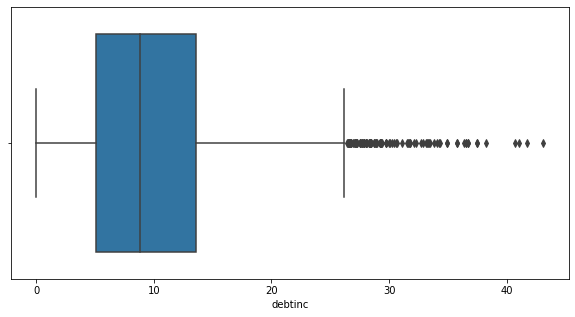

In [66]:
sns.boxplot(x=df_dis['debtinc'],data=df_dis)

In [67]:
def outlier_miss_treat(x):
    x = x.clip(lower=x.quantile(0.05),upper=x.quantile(0.95))
    return x

In [68]:
df_dis=df_dis.apply(outlier_miss_treat)

In [69]:
df_dis['total_spend']=ndf['trans_spend']

In [70]:
cdf=pd.concat([df_dis,df_con],axis=1)

In [71]:
cdf=cdf.apply(outlier_miss_treat)

In [72]:
eqn='total_spend~active+carbuy+carcatvalue+card+card2benefit+card2fee+cardfee+carown+carvalue+churn+creddebt+debtinc+default+edcat+empcat+gender+inccat+internet+othdebt+owncd+owndvd+ownpda+owntv+ownvcr+pets+polcontrib+polparty+reason+response_01+response_02+response_03+retire+telecommute+tenure+union+wiremon'

### model using lasso

In [73]:
lasso_eqn='total_spend~income+card+cardmon'

In [74]:
clean= smf.ols(lasso_eqn, data=cdf).fit()
print(clean.summary())

                            OLS Regression Results                            
Dep. Variable:            total_spend   R-squared:                       0.216
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     459.1
Date:                Tue, 26 May 2020   Prob (F-statistic):          1.81e-263
Time:                        20:45:31   Log-Likelihood:                -4336.3
No. Observations:                5000   AIC:                             8681.
Df Residuals:                    4996   BIC:                             8707.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6257      0.025    187.496      0.0

In [75]:
#after standard data cleaning income, card,cardmon were able to explain 21% of variance in data

## model using f1

In [76]:
print(f1)

['inccat', 'income', 'carvalue', 'othdebt', 'card', 'creddebt', 'carcatvalue', 'retire', 'owndvd', 'ownvcr', 'owncd', 'empcat', 'wireten', 'edcat', 'wiremon']


In [79]:
f1='total_spend~inccat+income+card+retire'

In [80]:
clean= smf.ols(f1, data=cdf).fit()
print(clean.summary())

                            OLS Regression Results                            
Dep. Variable:            total_spend   R-squared:                       0.226
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     364.2
Date:                Tue, 26 May 2020   Prob (F-statistic):          1.45e-275
Time:                        20:46:13   Log-Likelihood:                -4305.2
No. Observations:                5000   AIC:                             8620.
Df Residuals:                    4995   BIC:                             8653.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.5534      0.031    145.103      0.0

## model using f1 and lasso

In [81]:
u='total_spend~card+inccat+income+retire'

In [82]:
clean= smf.ols(u, data=cdf).fit()
print(clean.summary())

                            OLS Regression Results                            
Dep. Variable:            total_spend   R-squared:                       0.226
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     364.2
Date:                Tue, 26 May 2020   Prob (F-statistic):          1.45e-275
Time:                        20:46:14   Log-Likelihood:                -4305.2
No. Observations:                5000   AIC:                             8620.
Df Residuals:                    4995   BIC:                             8653.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.5534      0.031    145.103      0.0

### accuracy increased by 1% with two new varibles inccat,retire

## model using f regression variables

In [83]:
print(f)

['carcatvalue', 'card2benefit', 'carown', 'carvalue', 'churn', 'creddebt', 'debtinc', 'default', 'edcat', 'internet', 'othdebt', 'ownpda', 'reason', 'response_02', 'tenure']


In [84]:
w='total_spend~carcatvalue+card2benefit+carown+carvalue+churn+creddebt+debtinc+default+edcat+internet+othdebt+ownpda+reason+response_02+tenure'

In [85]:
clean= smf.ols(w, data=cdf).fit()
print(clean.summary())

                            OLS Regression Results                            
Dep. Variable:            total_spend   R-squared:                       0.138
Model:                            OLS   Adj. R-squared:                  0.136
Method:                 Least Squares   F-statistic:                     53.37
Date:                Tue, 26 May 2020   Prob (F-statistic):          1.06e-148
Time:                        20:46:14   Log-Likelihood:                -4572.6
No. Observations:                5000   AIC:                             9177.
Df Residuals:                    4984   BIC:                             9282.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        4.4542      0.046     96.877   

### f regression is giving very bad accuracy

In [86]:
print(vif)

['response_01', 'response_03', 'response_02', 'union', 'card2fee', 'cardfee', 'telecommute', 'polcontrib', 'polparty', 'carbuy', 'churn', 'pets', 'default', 'active', 'gender']


In [87]:
v1='total_spend~response_01+response_03+response_02+union+card2fee+cardfee+telecommute+polcontrib+polparty+carbuy+churn+pets+default+active+gender'

In [88]:
clean= smf.ols(v1, data=cdf).fit()
print(clean.summary())

                            OLS Regression Results                            
Dep. Variable:            total_spend   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     4.174
Date:                Tue, 26 May 2020   Prob (F-statistic):           1.01e-07
Time:                        20:46:15   Log-Likelihood:                -4913.8
No. Observations:                5000   AIC:                             9860.
Df Residuals:                    4984   BIC:                             9964.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       4.5599      0.024    193.145      

#### vif is also giving very bad accuracy

total_spend~card+inccat+income+retire'

In [89]:
imp=cdf.loc[:,['card','inccat','income','retire']]

In [90]:
imp.income

0        31.0
1        15.0
2        35.0
3        20.0
4        23.0
        ...  
4995    147.0
4996     83.0
4997    108.0
4998    147.0
4999     77.0
Name: income, Length: 5000, dtype: float64

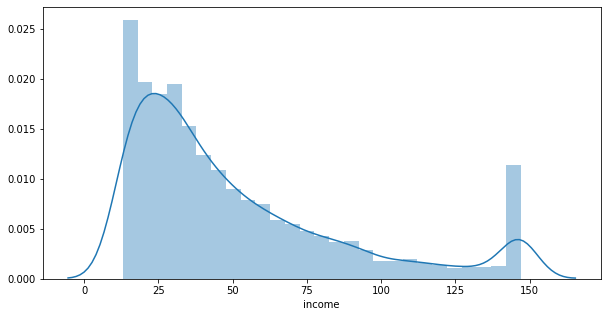

In [91]:
sns.distplot(imp.income)

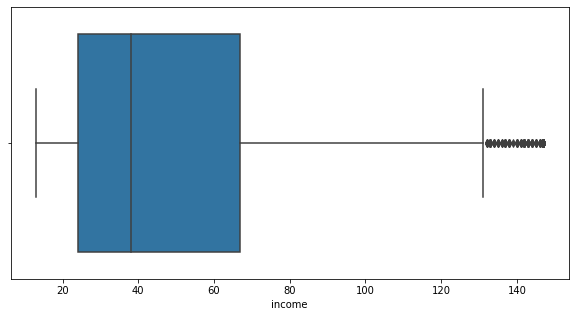

In [92]:
sns.boxplot(x=imp.income,data=imp)

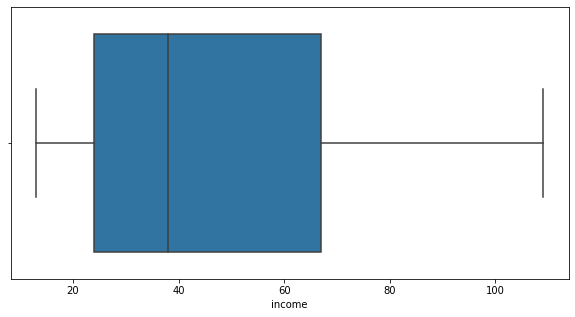

In [93]:
sns.boxplot(x=imp.income.clip(upper=imp.income.quantile(0.90)),data=imp)

In [94]:
imp['t_income']=imp.income.clip(upper=imp.income.quantile(0.90))

In [95]:
cdf['t_income']=imp.income.clip(upper=imp.income.quantile(0.90))

In [96]:
f2='total_spend~card+inccat+t_income+retire'

In [97]:
clean= smf.ols(f1, data=cdf).fit()
print(clean.summary())

                            OLS Regression Results                            
Dep. Variable:            total_spend   R-squared:                       0.226
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     364.2
Date:                Tue, 26 May 2020   Prob (F-statistic):          1.45e-275
Time:                        20:46:16   Log-Likelihood:                -4305.2
No. Observations:                5000   AIC:                             8620.
Df Residuals:                    4995   BIC:                             8653.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.5534      0.031    145.103      0.0

In [108]:
l=[]
for e in df_dis.columns:
    if df_dis[e].nunique(dropna=True)>10:
        l.append(e)
    

In [115]:
max_threshold=df_dis[l].income.quantile(0.95)

In [119]:
df_dis[df_dis[l].income>max_threshold]

,wiremon,polview,carvalue,income,commute,jobcat,debtinc,tollmon,tenure,spousedcat,reside,othdebt,cars,cardmon,pets,equipmon,creddebt,total_spend


In [131]:
df_dis[l][df_dis[l]['income']>=df_dis[l]['income'].quantile(0.95)]

,wiremon,carvalue,income,debtinc,tollmon,tenure,othdebt,cardmon,pets,equipmon,creddebt,total_spend
16,40.200,72.0,147.0,9.5,28.75,48.0,11.812,29.25,1.0,43.1500,1.8000,4.478189
17,0.000,72.0,147.0,10.7,43.50,70.0,11.812,19.75,0.0,0.0000,6.3715,5.997753
49,51.305,72.0,147.0,9.4,43.50,48.0,11.240,13.75,2.0,0.0000,6.3715,5.999919
83,0.000,72.0,147.0,11.7,43.50,72.0,11.812,24.25,0.0,0.0000,6.3715,5.486286
110,0.000,-1.0,147.0,2.6,43.50,71.0,4.460,12.00,2.0,0.0000,1.3700,5.408939
...,...,...,...,...,...,...,...,...,...,...,...,...
4937,0.000,72.0,147.0,22.2,26.50,34.0,11.812,10.00,0.0,0.0000,6.3715,4.593783
4949,33.150,72.0,147.0,5.2,0.00,50.0,11.812,0.00,7.0,48.1000,4.2200,5.469312
4959,51.305,72.0,147.0,11.7,24.25,71.0,11.812,42.00,1.0,49.0525,6.3715,5.000080
4995,0.000,64.5,147.0,8.0,0.00,69.0,7.750,21.75,4.0,0.0000,6.3715,6.144758
